## Kaggle competiton - Titanic 
 * Ori Nissim
 * ID: 315903518
 * Kaggle profile: https://www.kaggle.com/orinissim 
 

In [39]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### TL;DR
The competition's about figuring out who will survive the titanic or not by considering all the features given to us and making new features from them.

I will be trying to figure out what features correlate most with the survivle rate and then i will try to make new features from them so the learning will be even better.
The mission was challenging and i helped me learn a lot and made me search for help and find it on my own

### EDA - Essential Data Analysis
Let's understand the data we have:

In [40]:

## get data frame 
# make sure to download kaggle's json from this 'https://www.kaggle.com/general/74235' - kaggle's api key 
#  <----- put it in the files to the left
# you can now run this code 
! pip install -q kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [41]:
! chmod 600 ~/.kaggle/kaggle.json

In [42]:
! kaggle datasets list

ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              1KB  2022-03-25 09:17:26           2926        196  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3032         97  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           4753         93  1.0              
datasets/vivek4

In [43]:
! kaggle competitions download -c 'titanic'

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [44]:
! mkdir titanic_df
! unzip titanic.zip -d titanic_df


mkdir: cannot create directory ‘titanic_df’: File exists
Archive:  titanic.zip
replace titanic_df/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [45]:
df = pd.read_csv('titanic_df/train.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
df_copy = df.copy()

### Data Dictionary
* Pclass = ticket class - first, second, third, while first the highest and most expensive
* sibsp = # of siblings / spouses aboard the Titanic
* parch = # of parents / children aboard the Titanic

Assuming other features are pretty straight forward

In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### So far:
 * we can see average age of a passenger is about 29 y/o
 * this kind of data presentation isnt really useful for us  :)


In [48]:
# import px and create pie charts for each categorical feature
import plotly.express as px
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'Sex')
create_pie_chart_of_count(df, 'Pclass')
create_pie_chart_of_count(df, 'SibSp')
create_pie_chart_of_count(df, 'Parch')
create_pie_chart_of_count(df, 'Embarked')

### A little bit better to see the distribution of the data:
* most of the passengers are males - 64.8%
* most of the passengers do not have any parent, child, of sibling on board with them approx. 68 - 76 % 
* The majority of the passengers embarked in South hampton - 72.4%

In [49]:
# create sunburst charts of the features
df_copy = df.copy()
fig = px.sunburst(df_copy , path=['Sex', 'Parch', 'SibSp', 'Pclass', 'Survived'])
fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
fig.show()


### We can see from this sunburst diagram that most males did not survive and the percent of women survivors is greater

# Correlation between featueres:

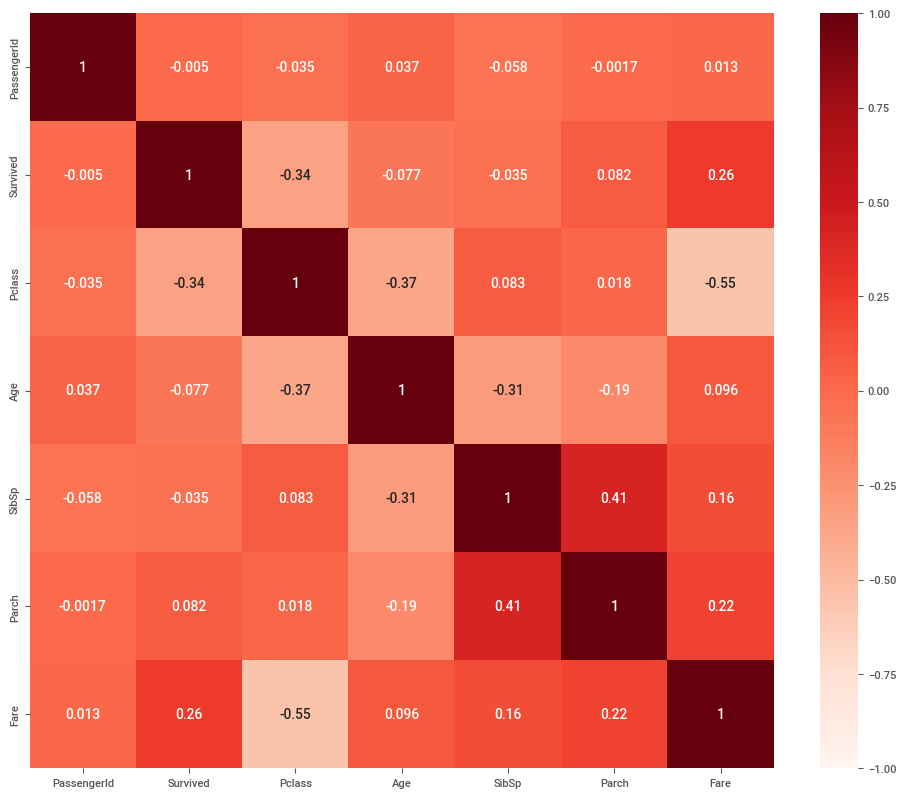

In [50]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=-1, vmax=1)
plt.show()

## After a quick glance I see there is a good correlation between fare rate and survived passangers, and that there is a good negative relation between Ticket class and surived passangers

## Add new features

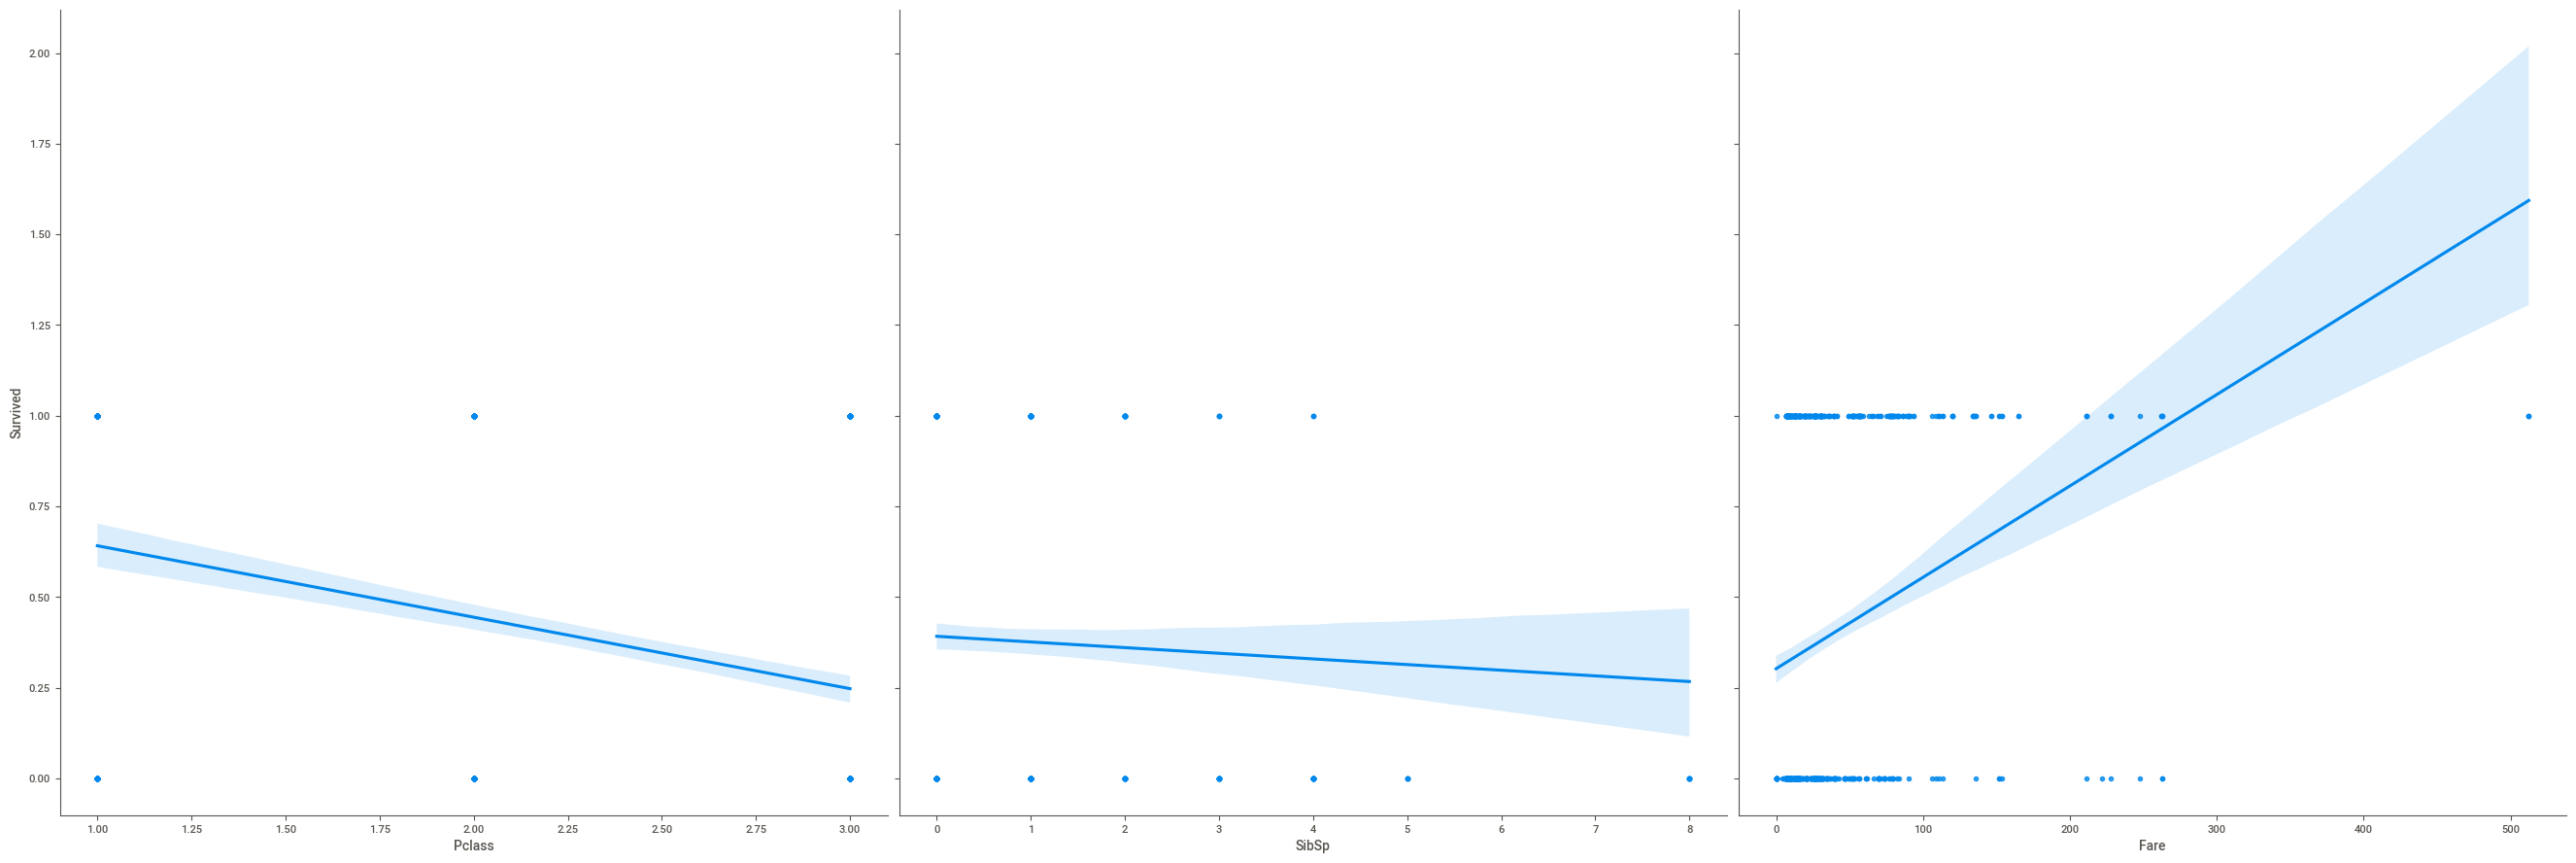

In [51]:
df_copy = df.copy()
df_copy.insert(column="Family size", value=df["Parch"] + df["SibSp"], loc=1)

sns.pairplot(data=df_copy, palette='pastel', x_vars=[ "Pclass", "SibSp", "Fare"], y_vars=["Survived"], kind="reg", height=9)

## Handle missing values

28.0


Text(0.5, 1.0, 'Missing values heatmap')

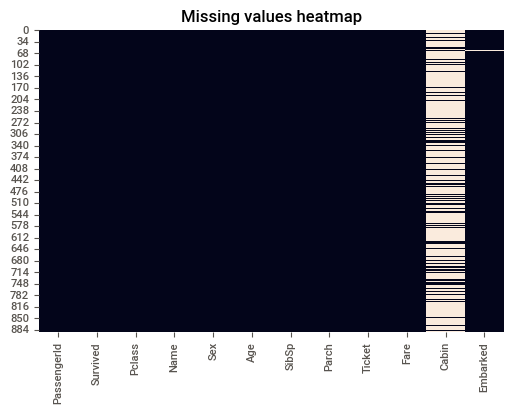

In [52]:
## calculate mean of passangers age because there are missing datas for some passangers
ages_med = df['Age'].median()
print(ages_med)

df['Age'] = df['Age'].fillna(ages_med)

df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")


### Create a new feature from number of family memebers, change 'sex' to 'isMale', drop the irrelevent cabin 

In [53]:
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 1, 0)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
# remove meaningless parameters

In [54]:
df['isMale']=np.where((df["Sex"])== 'male', 0, 1)


In [55]:
df.drop('Sex', axis=1, inplace=True)


In [56]:
df.drop('Cabin', axis=1, inplace=True)


In [57]:
df.describe() # after removing and adding features

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,isMale
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,0.397306,0.352413
std,257.353842,0.486592,0.836071,13.019697,49.693429,0.489615,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


In [58]:
pip install sweetviz


### Another view of the data

                                             |          | [  0%]   00:00 -> (? left)


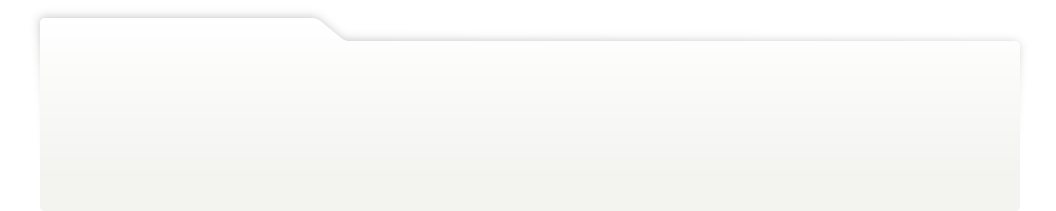
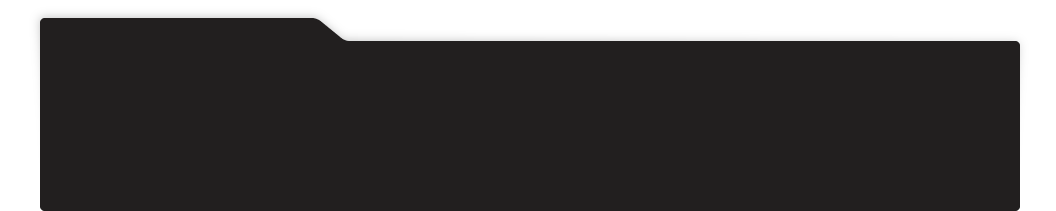
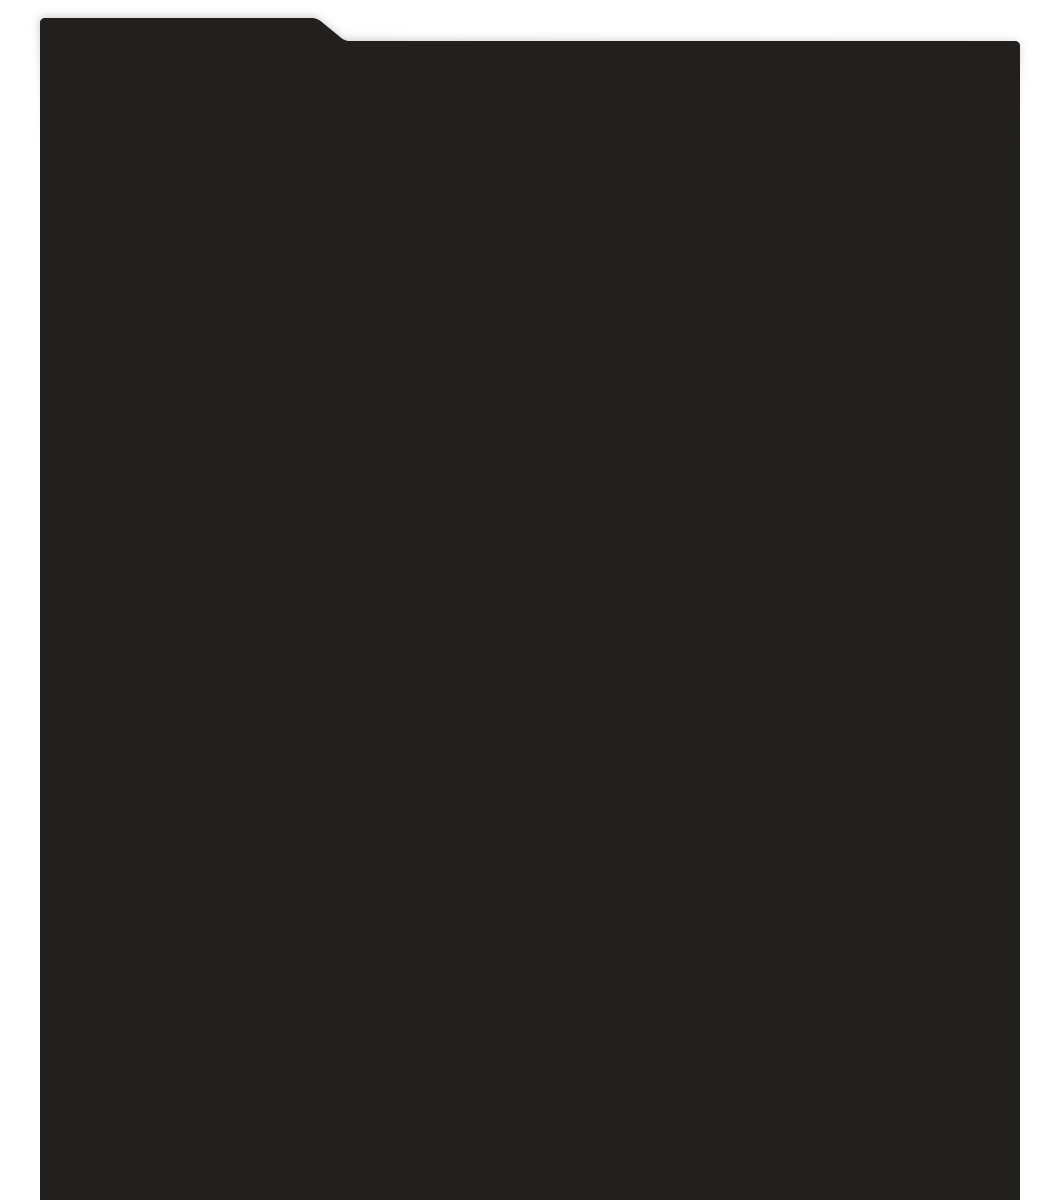
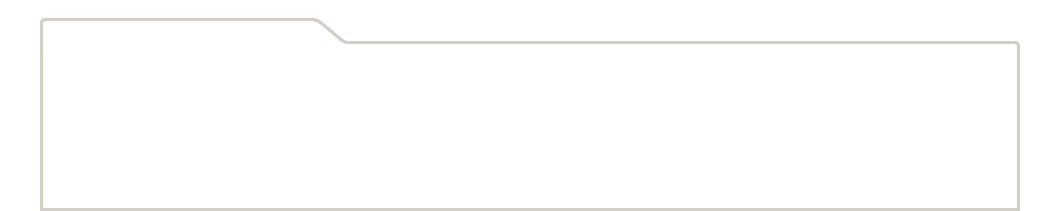
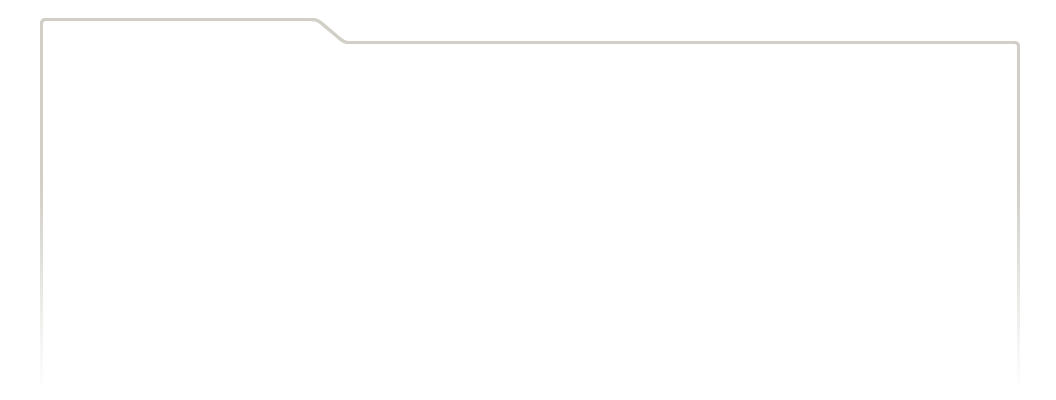
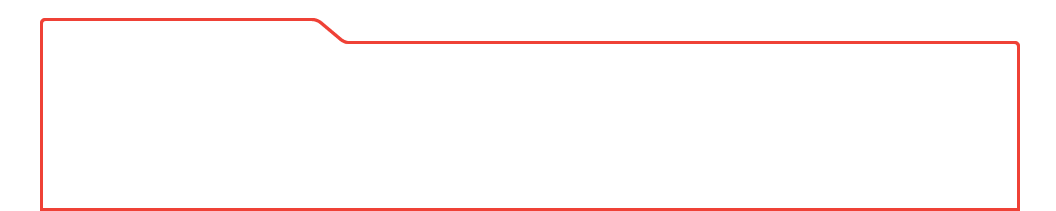
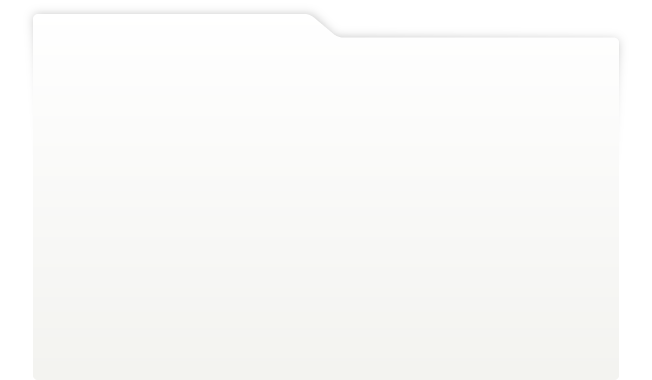
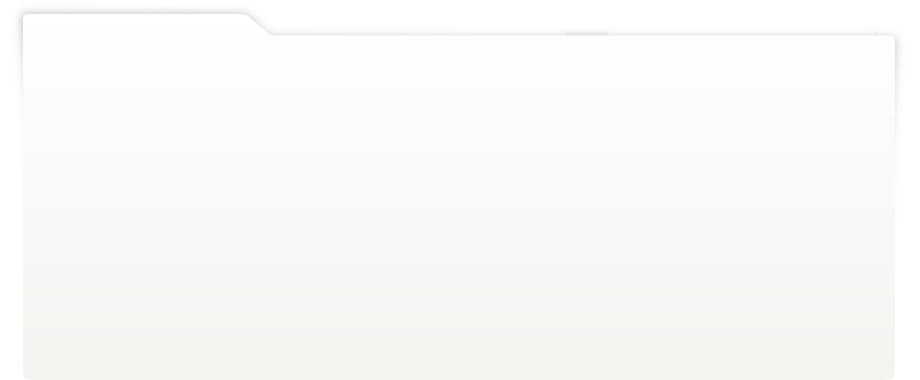
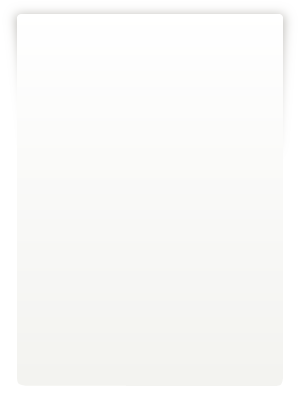
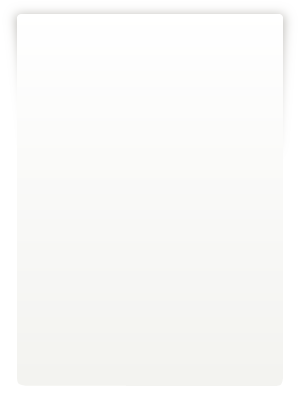
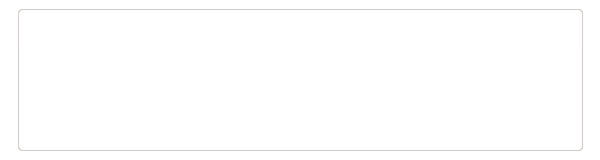
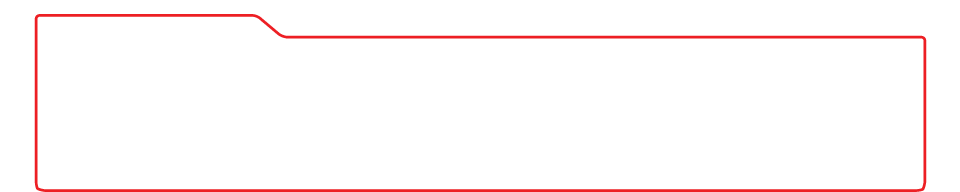
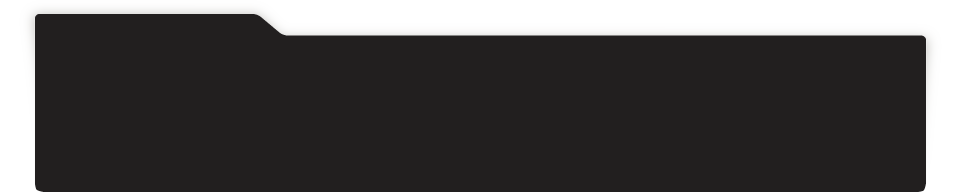
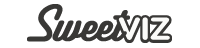
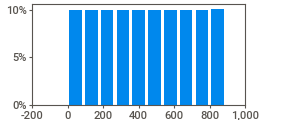
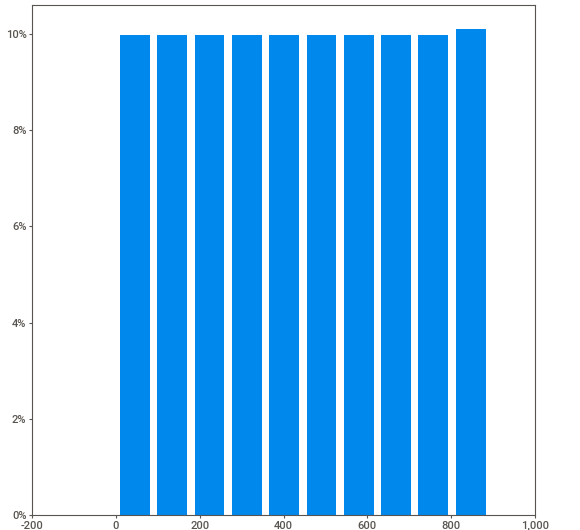
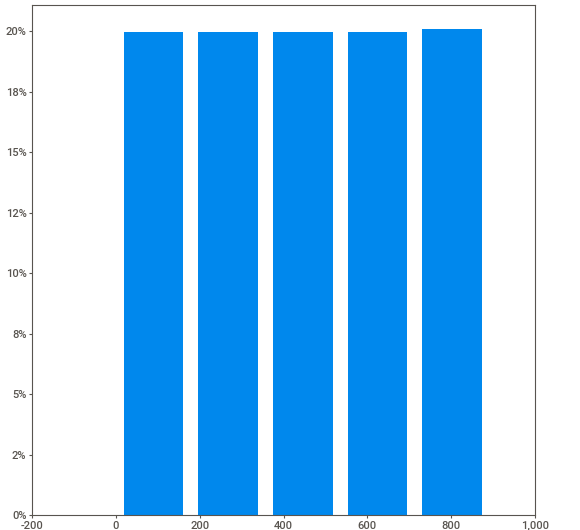
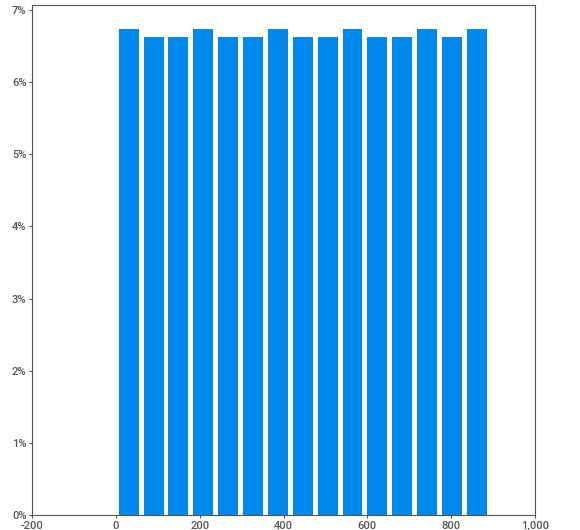
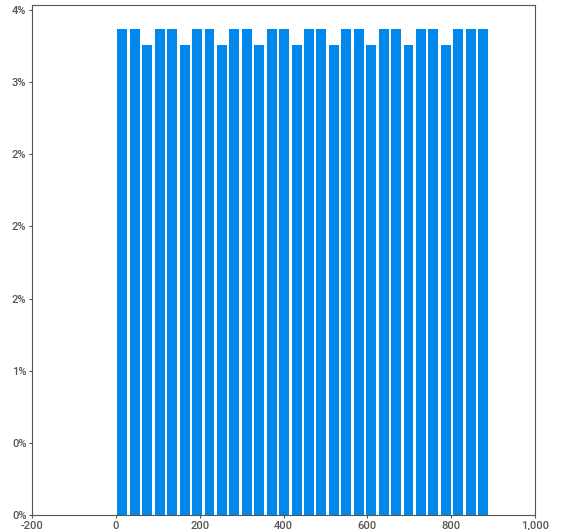
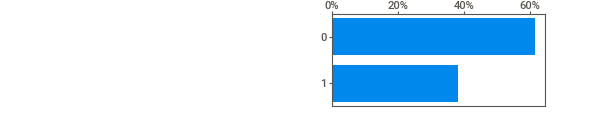
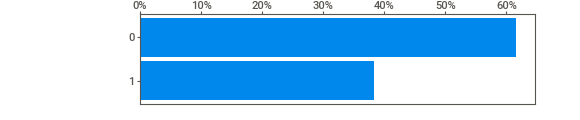
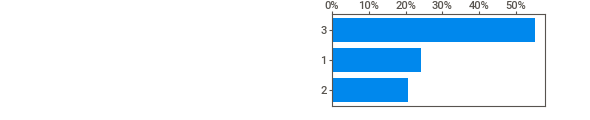
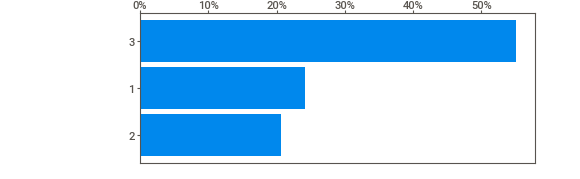
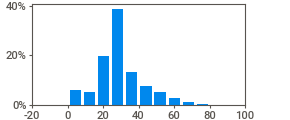
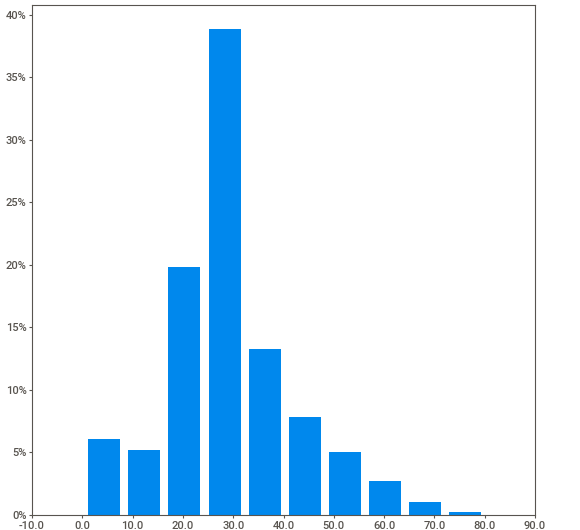
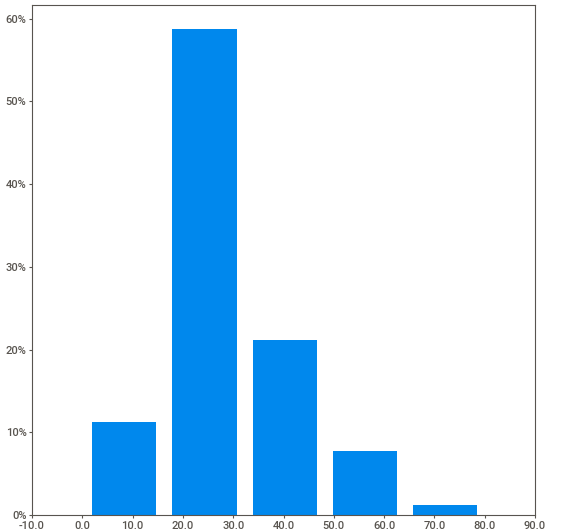
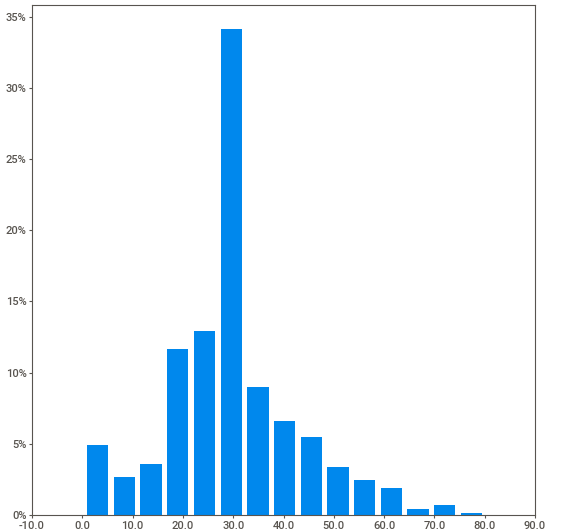
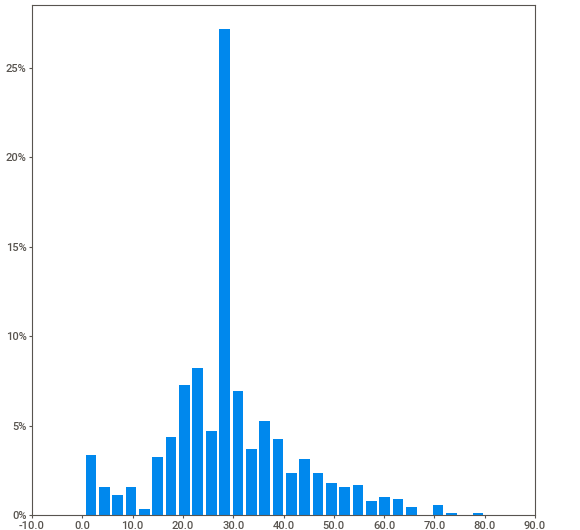
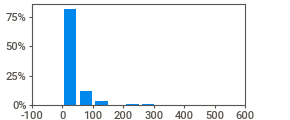
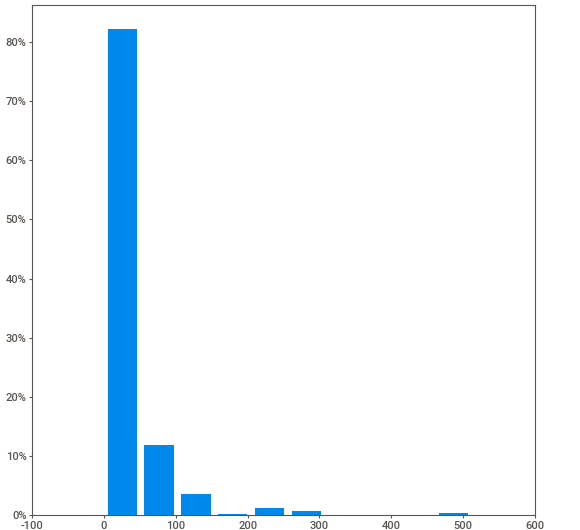
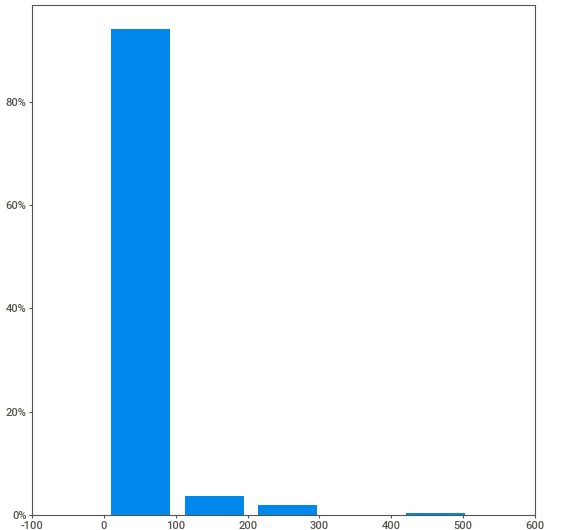
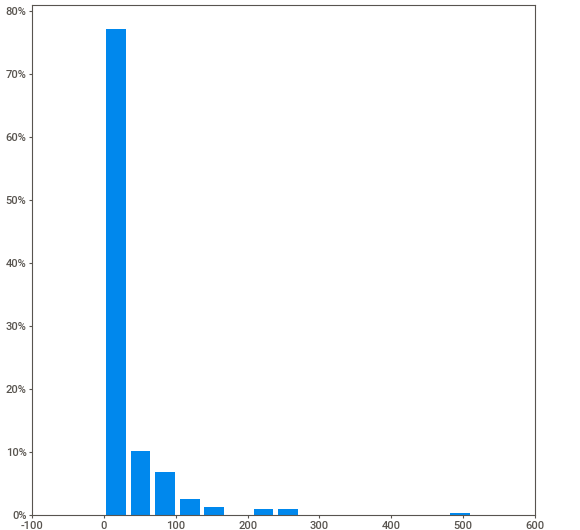
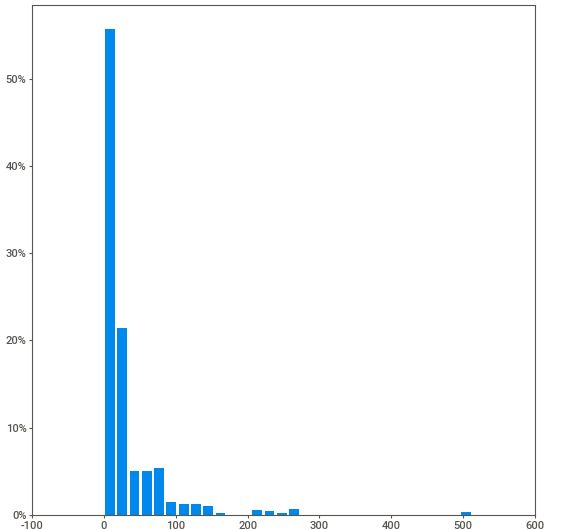
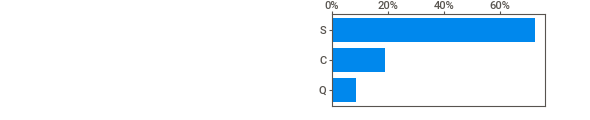
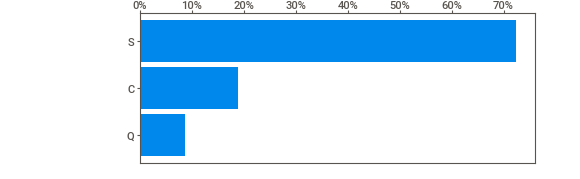
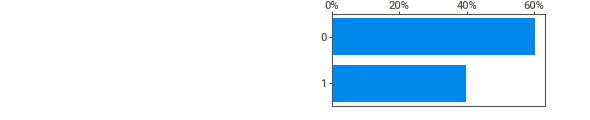
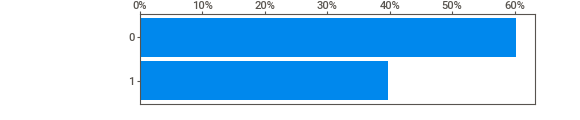
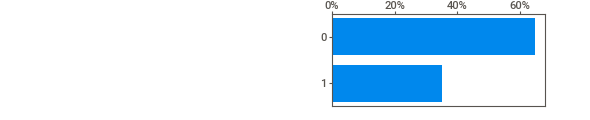
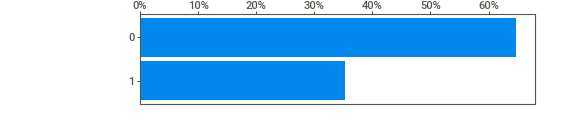
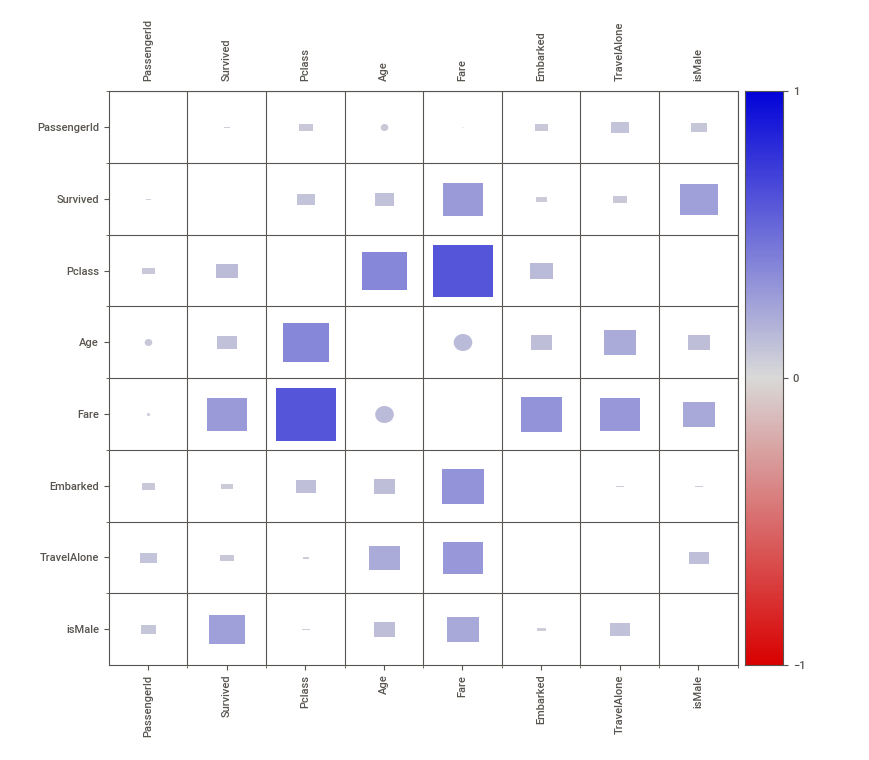
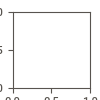

In [59]:
#  import sweetviz and show report on usedcars_df
import sweetviz as sw

df_report = sw.analyze(df)
df_report.show_notebook(layout='vertical')

## Create ordinal catagories for Logistic Regression model

## split the data

In [60]:
# final organizations
X = df.copy()
t = df['Survived']

In [61]:
X = pd.get_dummies(df, columns=["Pclass"])


In [62]:
X = pd.get_dummies(df, columns=["Embarked"])


In [63]:
X.drop('Survived', axis=1, inplace=True)
X.drop('Name', axis=1, inplace=True)
X.drop('Ticket', axis=1, inplace=True)


In [64]:
X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.3, random_state=42)


In [65]:
display(X_train)

,PassengerId,Pclass,Age,Fare,TravelAlone,isMale,Embarked_C,Embarked_Q,Embarked_S
445,446,1,4.0,81.8583,1,0,0,0,1
650,651,3,28.0,7.8958,0,0,0,0,1
172,173,3,1.0,11.1333,1,1,0,0,1
450,451,2,36.0,27.7500,1,0,0,0,1
314,315,2,43.0,26.2500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
106,107,3,21.0,7.6500,0,1,0,0,1
270,271,1,28.0,31.0000,0,0,0,0,1
860,861,3,41.0,14.1083,1,0,0,0,1
435,436,1,14.0,120.0000,1,1,0,0,1


In [66]:
display(t_train)

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

## Test our model

In [67]:
# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

model = LogisticRegression()
model.fit(X_train,t_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [68]:
model.score(X_train, t_train)

0.7881219903691814

### We see this model works better now on the training data, let's test it on unseen data:

In [69]:
test_prediction = model.predict(X_val)

In [70]:
model.score(X_val, t_val)

0.7910447761194029

### Seems like it even performed a bit better !

### Let's try a small change to the weight of the classes

In [71]:
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train,t_train)
model2.score(X_train, t_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7817014446227929

### Let's have a go with MLP 

In [72]:
# import neural_network and run MLP on the data
from sklearn import neural_network
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_val)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_val, t_val))
print()
print('Cross Entropy on train', metrics.log_loss(t_train, y_train_prob))
print('Cross Entropy on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.6629213483146067
Accuracy score on test 0.667910447761194

Cross Entropy on train 0.6354241490057767
Cross Entropy on test 0.6492209574174918


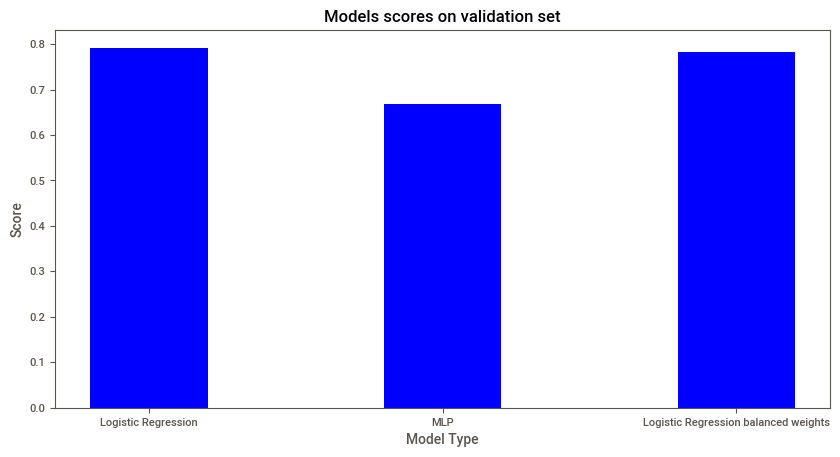

In [73]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Logistic Regression':model.score(X_val,t_val), 'MLP':MLP_cls.score(X_val,t_val), 'Logistic Regression balanced weights':model2.score(X_val,t_val) }
models = list(data.keys())
scores = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, scores, color ='blue',
		width = 0.4)

plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("Models scores on validation set")
plt.show()


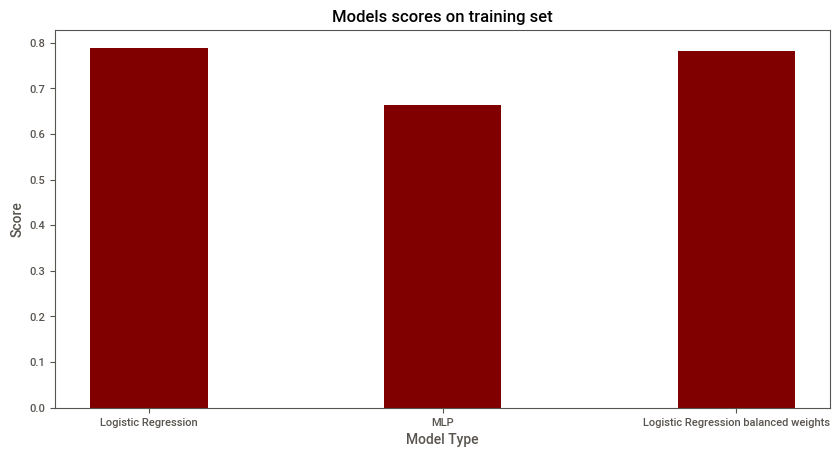

In [74]:

# creating the dataset
data = {'Logistic Regression':model.score(X_train,t_train), 'MLP':MLP_cls.score(X_train,t_train), 'Logistic Regression balanced weights':model2.score(X_train,t_train) }
models = list(data.keys())
scores = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, scores, color ='maroon',
		width = 0.4)

plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("Models scores on training set")
plt.show()

### We can see the logistic regression model with no changes was the best for us overall

Text(0.5, 1.0, 'Missing values heatmap')

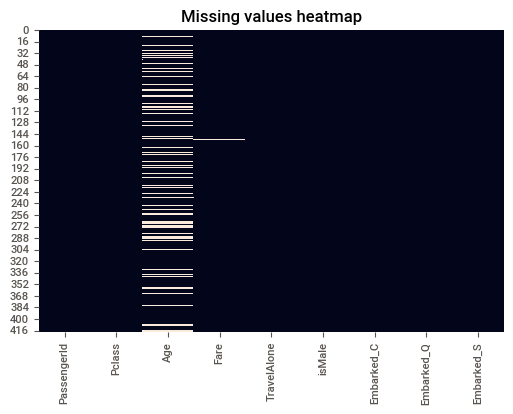

In [86]:
df_test = pd.read_csv('titanic_df/test.csv') # read test df and test the model with best score (LR)

df_test['TravelAlone']=np.where((df_test["SibSp"]+df_test["Parch"])>0, 1, 0)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)
# remove meaningless parameters

df_test['isMale']=np.where((df_test["Sex"])== 'male', 0, 1)
df_test.drop('Sex', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df_test = pd.get_dummies(df_test, columns=["Embarked"])

df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")


### Handle missing values

Text(0.5, 1.0, 'Missing values heatmap')

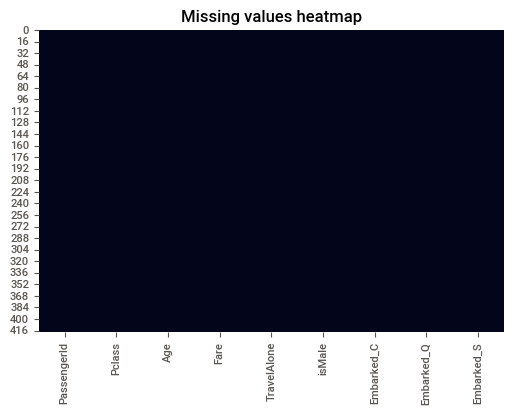

In [87]:
ages_med = df_test['Age'].median()
df_test['Age'] = df_test['Age'].fillna(ages_med)

fare_med = df_test['Fare'].median()
df_test['Fare'] = df_test['Fare'].fillna(ages_med)

sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")


In [88]:

output = pd.DataFrame({"PassengerId":df_test.PassengerId, 'Survived': model.predict(df_test)})
output = output.astype({'PassengerId': 'int32'})
output.to_csv('submission.csv', index=False)

### Model's score:

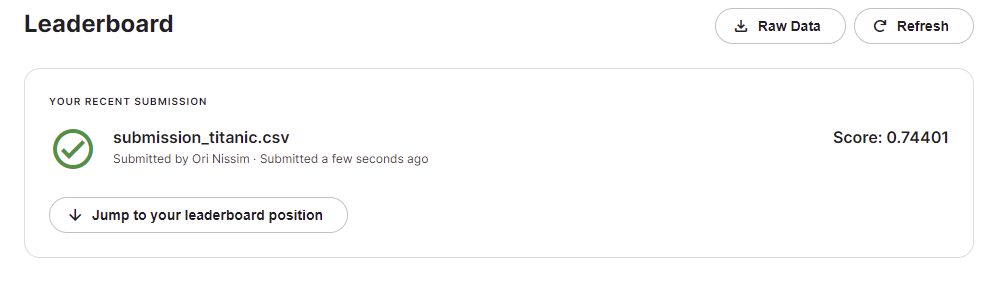

In [89]:
from IPython.display import Image
Image(filename='model score.png')

#### Summary
This mission was really fun at first but when i started to understand i didnt even do it the right way and not explained at all i had to start using what we learned in practice and what i could find online to solve the problems i encountered during this mission.
* Improving the models was very hard and thinking of a way to do so
* Also dealing with the graphs wasnt easy
* Understanding what we actually do here and how we do it helped me under it much better
